In [2]:
# ===============================
# 데이터 처리
# ===============================
import pandas as pd
import numpy as np
# ===============================
# 시각화
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 깨짐 방지 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# ===============================
# 머신러닝
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# ===============================
# StringIO
# ===============================
from io import StringIO


In [3]:
df='''date,device,visitor_id,page_view,stay_time,purchased,sales
2025-01-01,mobile,U001,5,180,0,0
2025-01-01,pc,U002,8,420,1,56000
2025-01-01,mobile,U003,3,95,0,0
2025-01-02,pc,U004,10,600,1,82000
2025-01-02,mobile,U005,7,310,1,39000
2025-01-02,pc,U006,4,150,0,0
2025-01-03,mobile,U007,2,60,0,0
2025-01-03,pc,U008,12,720,1,99000
2025-01-03,mobile,U009,6,280,1,42000
2025-01-04,pc,U010,5,210,0,0
2025-01-04,mobile,U011,9,450,1,67000
2025-01-04,mobile,U012,4,160,0,0
2025-01-05,pc,U013,11,650,1,88000
2025-01-05,mobile,U014,6,300,0,0
2025-01-05,pc,U015,7,340,1,51000
2025-01-06,mobile,U016,8,390,1,61000
2025-01-06,pc,U017,3,120,0,0
2025-01-06,mobile,U018,5,230,0,0
2025-01-07,pc,U019,9,480,1,73000
2025-01-07,mobile,U020,4,170,0,0
'''

In [5]:
df1=pd.read_csv(StringIO(df))

In [6]:
df1

,date,device,visitor_id,page_view,stay_time,purchased,sales
0,2025-01-01,mobile,U001,5,180,0,0
1,2025-01-01,pc,U002,8,420,1,56000
2,2025-01-01,mobile,U003,3,95,0,0
3,2025-01-02,pc,U004,10,600,1,82000
4,2025-01-02,mobile,U005,7,310,1,39000
5,2025-01-02,pc,U006,4,150,0,0
6,2025-01-03,mobile,U007,2,60,0,0
7,2025-01-03,pc,U008,12,720,1,99000
8,2025-01-03,mobile,U009,6,280,1,42000
9,2025-01-04,pc,U010,5,210,0,0


In [10]:
df1['date']=pd.to_datetime(df1['date'])

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        20 non-null     datetime64[ns]
 1   device      20 non-null     object        
 2   visitor_id  20 non-null     object        
 3   page_view   20 non-null     int64         
 4   stay_time   20 non-null     int64         
 5   purchased   20 non-null     int64         
 6   sales       20 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.2+ KB


In [19]:
df2=df1.groupby('device').agg(체류시간=('stay_time','mean'),
                         구매자=('purchased','mean'),
                         판매평균=('sales','mean'))

In [31]:
df2=df2.round(2)


In [32]:
df1.groupby('device')['sales'].mean()

device
mobile    19000.000000
pc        49888.888889
Name: sales, dtype: float64

In [33]:
df2

,체류시간,구매자,판매평균
device,,,
mobile,238.64,0.36,19000.00
pc,410.00,0.67,49888.89


In [34]:
df3=df1.groupby('purchased').agg(page=('page_view','mean'),
                            stay=('stay_time','mean'))

In [35]:
df3

,page,stay
purchased,,
0,4.1,167.5
1,8.7,464.0


In [44]:
df2

,device,체류시간,구매자,판매평균
0,mobile,238.64,0.36,19000.00
1,pc,410.00,0.67,49888.89


<AxesSubplot:xlabel='device', ylabel='구매자'>

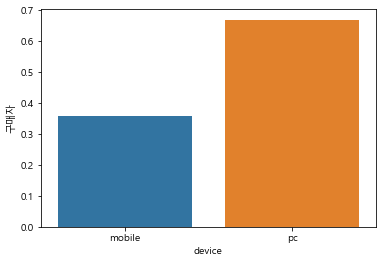

In [43]:
sns.barplot(data=df2,x='device',y='구매자')  #기기 전환율 막대그래프

<AxesSubplot:xlabel='purchased', ylabel='stay_time'>

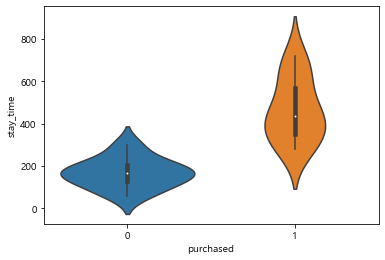

In [47]:
sns.violinplot(data=df1,x='purchased',y='stay_time') #체류시간 구매여부

<AxesSubplot:xlabel='page_view', ylabel='sales'>

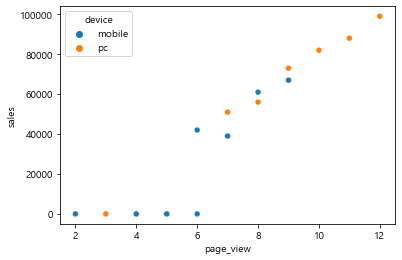

In [54]:
sns.scatterplot(data=df1,x='page_view',y='sales',hue='device')

In [52]:
df1

,date,device,visitor_id,page_view,stay_time,purchased,sales
0,2025-01-01,mobile,U001,5,180,0,0
1,2025-01-01,pc,U002,8,420,1,56000
2,2025-01-01,mobile,U003,3,95,0,0
3,2025-01-02,pc,U004,10,600,1,82000
4,2025-01-02,mobile,U005,7,310,1,39000
5,2025-01-02,pc,U006,4,150,0,0
6,2025-01-03,mobile,U007,2,60,0,0
7,2025-01-03,pc,U008,12,720,1,99000
8,2025-01-03,mobile,U009,6,280,1,42000
9,2025-01-04,pc,U010,5,210,0,0


In [60]:
df1 = pd.get_dummies(df1, columns=['device'], drop_first=True)

In [61]:
df1

,date,visitor_id,page_view,stay_time,purchased,sales,device_pc
0,2025-01-01,U001,5,180,0,0,False
1,2025-01-01,U002,8,420,1,56000,True
2,2025-01-01,U003,3,95,0,0,False
3,2025-01-02,U004,10,600,1,82000,True
4,2025-01-02,U005,7,310,1,39000,False
5,2025-01-02,U006,4,150,0,0,True
6,2025-01-03,U007,2,60,0,0,False
7,2025-01-03,U008,12,720,1,99000,True
8,2025-01-03,U009,6,280,1,42000,False
9,2025-01-04,U010,5,210,0,0,True


In [64]:
from sklearn.model_selection import train_test_split
X=df1[['page_view','stay_time','device_pc']]
y=df1['purchased']

X_train,X_test,y_train,y_test = train_test_split(
X,y,
test_size=0.2,       #전체 데이터 80% 학습.20% 검증용 
random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred=model.predict(X_test)

In [70]:
y_pred

array([0, 0, 1, 1], dtype=int64)

In [72]:
accuracy_score(y_test,y_pred)    #정확도
confusion_matrix(y_test,y_pred)  

array([[2, 0],
       [0, 2]], dtype=int64)

In [74]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)    #100% 예측 소규모 자료라 100%도 나올수있다 

1.0

In [75]:
import pandas as pd

coef_df = pd.DataFrame({
    '변수': X_train.columns,
    '계수(coef)': model.coef_[0]
})

coef_df


,변수,계수(coef)
0,page_view,0.314419
1,stay_time,0.040271
2,device_pc,0.015637


In [82]:
coef_df['영향력'] = coef_df['계수(coef)'].abs()
coef_df = coef_df.sort_values(by='영향력', ascending=False)

coef_df                #영향력 순위보기 절댓값이 클수록  구매에 더 큰 영향


,변수,계수(coef),영향력
0,page_view,0.314419,0.314419
1,stay_time,0.040271,0.040271
2,device_pc,0.015637,0.015637
